In [1]:
# Import LangGraph components and typing helpers
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, List, Literal

In [2]:
# Define the structure for quadratic equation state
class QuadraticEquation(TypedDict):
    a: int  # Coefficient of x^2
    b: int  # Coefficient of x
    c: int  # Constant term
    equation: str  # Equation string
    discriminant: float  # Discriminant value
    result: str  # Result string

In [3]:
# Format the quadratic equation as a string
def show_equation(state: QuadraticEquation):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {"equation": equation}

In [4]:
# Calculate the discriminant value
def calculate_discriminant(state: QuadraticEquation):
    discriminant = state["b"]**2 - 4 * state["a"] * state["c"]
    return {"discriminant": discriminant}

In [5]:
# Calculate two real roots
def real_roots(state: QuadraticEquation):
    root_1 = (-state["b"] + state["discriminant"] ** 0.5) / (2 * state["a"])
    root_2 = (-state["b"] - state["discriminant"] ** 0.5) / (2 * state["a"])
    result = f"The roots are {root_1} and {root_2}"
    return {"result": result}

In [6]:
# Calculate the repeated root
def repeated_roots(state: QuadraticEquation):
    root = -state["b"] / (2 * state["a"])
    result = f"The repeated root is {root}"
    return {"result": result}

In [7]:
# Handle case with no real roots
def no_real_roots(state: QuadraticEquation):
    result = "The equation has no real roots"
    return {"result": result}

In [8]:
# Decide which root case applies based on discriminant
def check_conditions(state: QuadraticEquation) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state["discriminant"] > 0:
        return "real_roots"
    elif state["discriminant"] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [9]:
# Create a state graph for the quadratic equation
graph = StateGraph(QuadraticEquation)

# Add nodes for each step
graph.add_node("quadratic_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)

# Define edges between nodes
graph.add_edge(START, "quadratic_equation")
graph.add_edge("quadratic_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_conditions)

graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

workflow = graph.compile()  # Compile the workflow

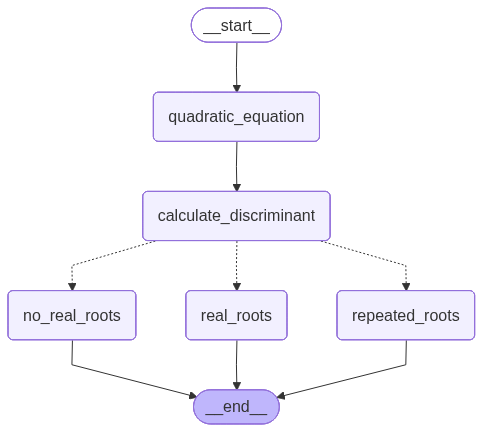

In [10]:
graph.compile()

In [11]:
# Example initial state for the quadratic equation
initial_state = {
    "a": 4,  # Example coefficient a
    "b": -5, # Example coefficient b
    "c": -4  # Example coefficient c
}

# Run the workflow with the initial state
result = workflow.invoke(initial_state)
result

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x^2 + -5x + -4 = 0',
 'discriminant': 89,
 'result': 'The roots are 1.8042476415070754 and -0.5542476415070754'}